In [1]:
# The code was removed by DSX for sharing.

#Read Review Data
Read the review data from round 11 of the Yelp Dataset Challenge. 
The 5.2 million reviews in this data file include every review from the 
following 11 cities, except those reviews that Yelp has filetered as not
being recommended.
* Las Vegas, NV
* Phoenix, AZ
* Madison, WI 
* Urbana-Champaign, IL
* Cleveland, OH
* Pittsburgh, PA
* Charlotte, NC
* Montreal (Canada)
* Quebec (Canada)
* Edinburgh (U.K.)
* Karlsruhe, (Germany)

In [2]:
# Please read the documentation of PySpark to learn more about the possibilities to load data files.
# PySpark documentation: https://spark.apache.org/docs/2.0.1/api/python/pyspark.sql.html#pyspark.sql.SparkSession
# The SparkSession object is already initialized for you.
# The following variable contains the path to your file on your IBM Cloud Object Storage.

path_review = cos.url('review.json.bz2', 'spring2018andy023363be332e40639c4287c87e0af5e0')
df_reviews = spark.read.json(path_review)
print "number of reviews:", df_reviews.count()
df_reviews.printSchema()
df_reviews.show(5)

number of reviews: 5261669
root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: long (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)

+--------------------+----+----------+-----+--------------------+-----+--------------------+------+--------------------+
|         business_id|cool|      date|funny|           review_id|stars|                text|useful|             user_id|
+--------------------+----+----------+-----+--------------------+-----+--------------------+------+--------------------+
|0W4lkclzZThpx3V65...|   0|2016-05-28|    0|v0i_UHJMo_hPBq9bx...|    5|Love the staff, l...|     0|bv2nCi5Qv5vroFiqK...|
|AEx2SYEUJmTxVVB18...|   0|2016-05-28|    0|vkVSCC7xljjrAI4UG...|    5|Super simple plac...|     0|bv2nCi5Qv5vroFiqK...|
|VR6GpWIda3SfvPC-l...|   0|

#Read User Data
Read the user data from round 11 of the Yelp Dataset challenge. Includes users who wrote a review from any of the following (11) cities, except those reviews that Yelp has filtered as not being recommended.

* Las Vegas, NV
* Phoenix, AZ
* Madison, WI
* Urbana-Champaign, IL
* Cleveland, OH
* Pitssburgh, PA
* Charlotte, NC
* Montreal (Canada)
* Quebec (Canada)
* Karlsruhe, (Germany)

In [3]:
path_user = cos.url('user.json.bz2', 'spring2018andy023363be332e40639c4287c87e0af5e0') 
df_users = spark.read.json(path_user) 
print "Number of users:", df_users.count() 
df_users.printSchema() 
df_users.show(5)

number of users: 1326101
root
 |-- average_stars: double (nullable = true)
 |-- compliment_cool: long (nullable = true)
 |-- compliment_cute: long (nullable = true)
 |-- compliment_funny: long (nullable = true)
 |-- compliment_hot: long (nullable = true)
 |-- compliment_list: long (nullable = true)
 |-- compliment_more: long (nullable = true)
 |-- compliment_note: long (nullable = true)
 |-- compliment_photos: long (nullable = true)
 |-- compliment_plain: long (nullable = true)
 |-- compliment_profile: long (nullable = true)
 |-- compliment_writer: long (nullable = true)
 |-- cool: long (nullable = true)
 |-- elite: array (nullable = true)
 |    |-- element: long (containsNull = true)
 |-- fans: long (nullable = true)
 |-- friends: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- funny: long (nullable = true)
 |-- name: string (nullable = true)
 |-- review_count: long (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true

#U.S Births Dataset Example
National Data on the relative frequency of given names in the population of U.S. births where the individual has a Social Security Number (Tabulated based on Social Security records as of March 5, 2017) For each year of birth YYYY after 1879, we created a comma-delimited file called yobYYYY.txt. Each record in the individual annual files has the format "name,sex,number," where na  me is 2 to 15 characters, sex is M (male) or F (female) and "number" is the number of occurrences of the name. Each file issorted first on sex and then on number of occurrences in descending order. When there is a tie on the number of occurren  ces, names ar  e listed in alphabetical order. This sorting makes it easy to determine a name's rank. The first record for each sex has rank 1, the second record for each sex has rank 2, and so forth. To safeguard priv acy, we restrict our list of names to those with at least 5 occurrences. 

In [4]:

# Please read the documentation of PySpark to learn more about the possibilities to load data files.
# PySpark documentation: https://spark.apache.org/docs/2.0.1/api/python/pyspark.sql.html#pyspark.sql.SparkSession
# The SparkSession object is already initialized for you.
# The following variable contains the path to your file on your IBM Cloud Object Storage.
path_ssa = cos.url('ssa2017.csv.bz2', 'spring2018andy023363be332e40639c4287c87e0af5e0')
df_raw_ssa = spark.read.format("csv").option("header","true").load(path_ssa)
df_ssa = df_raw_ssa.select(df_raw_ssa.filename.substr(4,4).alias('filename'),\
                           df_raw_ssa.name, df_raw_ssa.gender, df_raw_ssa.births)

print "Number of Records: "
df_ssa.show(5)



Number of Records: 
+--------+---------+------+------+
|filename|     name|gender|births|
+--------+---------+------+------+
|    1884|     Mary|     F|  9217|
|    1884|     Anna|     F|  3860|
|    1884|     Emma|     F|  2587|
|    1884|Elizabeth|     F|  2549|
|    1884|   Minnie|     F|  2243|
+--------+---------+------+------+
only showing top 5 rows



#Transforming the Review and User Data
Using Spark select function again to do a transformation where we filter out those columns that are not needed.

In [5]:
from pyspark.sql import functions 
df_filtered_reviews = df_reviews.select(df_reviews.review_id, df_reviews.user_id,
                                       df_reviews.business_id, df_reviews.stars,
                                       functions.length(df_reviews.text).alias('review_length'))
print "Filtered Reviews"
df_filtered_reviews.show(5)

Filtered Reviews
+--------------------+--------------------+--------------------+-----+-------------+
|           review_id|             user_id|         business_id|stars|review_length|
+--------------------+--------------------+--------------------+-----+-------------+
|v0i_UHJMo_hPBq9bx...|bv2nCi5Qv5vroFiqK...|0W4lkclzZThpx3V65...|    5|          289|
|vkVSCC7xljjrAI4UG...|bv2nCi5Qv5vroFiqK...|AEx2SYEUJmTxVVB18...|    5|          213|
|n6QzIUObkYshz4dz2...|bv2nCi5Qv5vroFiqK...|VR6GpWIda3SfvPC-l...|    5|          502|
|MV3CcKScW05u5LVfF...|bv2nCi5Qv5vroFiqK...|CKC0-MOWMqoeWf6s-...|    5|          373|
|IXvOzsEMYtiJI0CAR...|bv2nCi5Qv5vroFiqK...|ACFtxLv8pGrrxMm6E...|    4|          523|
+--------------------+--------------------+--------------------+-----+-------------+
only showing top 5 rows



This function filters out the columns that are unnecessary. 
The table is similar to pulling a users information or a license ID. The yelp results consist of name, review count, average ratings, member since, 
and if he or she is an elite member. The conditional statement in the formula helps filter users if they are elite level or not. If their records show
greater than 0 it will show as "true."

In [6]:
#Filtered Yelp Users
df_filtered_users = df_users.select(df_users.user_id, df_users.name, df_users.review_count, 
                                   df_users.average_stars, df_users.yelping_since, 
                                   (functions.size(df_users.elite)>0).alias('is_elite'))
print "Filtered users: "
df_filtered_users.show(5)

Filtered users: 
+--------------------+------+------------+-------------+-------------+--------+
|             user_id|  name|review_count|average_stars|yelping_since|is_elite|
+--------------------+------+------------+-------------+-------------+--------+
|oMy_rEb0UBEmMlu-z...|Johnny|           8|         4.67|   2014-11-03|   false|
|JJ-aSuM4pCFPdkfoZ...| Chris|          10|          3.7|   2013-09-24|   false|
|uUzsFQn_6cXDh6rPN...| Tiffy|           1|          2.0|   2017-03-02|   false|
|mBneaEEH5EMyxaVyq...|  Mark|           6|         4.67|   2015-03-13|   false|
|W5mJGs-dcDWRGEhAz...|Evelyn|           3|         4.67|   2016-09-08|   false|
+--------------------+------+------------+-------------+-------------+--------+
only showing top 5 rows



#Averages and Counts by User in the Dataset
Regrouping review records based on the user_id field, so that the field is automatically included in the DataFrame generated in this information. 
The primary focus of the function is to find the averages of the review ratings, length, and count which will display the top 5 rows. 
The second chart is just a rename of the table columns compared to the first.

In [7]:
print "Average Review Ratings, Lengths, and Count: "
df_agg_rev = df_filtered_reviews.groupBy('user_id')\
.agg({'stars':'avg','review_length':'avg','review_id': 'count'})

df_agg_rev.show(5)

df_agg_reviews = df_agg_rev.select('user_id', 'avg(stars)', 'avg(review_length)', 'count(review_id)')\
.toDF('user_id', 'dataset_avg_stars','avg_review_length','dataset_review_count')

df_agg_reviews.show(5)

Average Review Ratings, Lengths, and Count: 
+--------------------+----------------+-----------------+------------------+
|             user_id|count(review_id)|       avg(stars)|avg(review_length)|
+--------------------+----------------+-----------------+------------------+
|wrxM9KTQAqF0-W_Hz...|               4|             3.75|            202.75|
|X2S5Cq8MEsLn63-6C...|               7|4.571428571428571|             173.0|
|CNHpjq5Vfs3c16C9-...|               1|              1.0|             528.0|
|zcp42G-kVhNOJIZSX...|               2|              2.0|             839.0|
|RMdcyXgulzkMRvFbN...|               1|              1.0|             663.0|
+--------------------+----------------+-----------------+------------------+
only showing top 5 rows

+--------------------+-----------------+------------------+--------------------+
|             user_id|dataset_avg_stars| avg_review_length|dataset_review_count|
+--------------------+-----------------+------------------+----------------

#Combined Users x Review
Both users and reviews were stated in the codes above so for this purpose they will both be combined. 
This will create a bigger table displaying more of the users information. 
An SQL function is used for this to select the relevant information. (inner join x select)

In [8]:

df_users_reviews = df_filtered_users.join(df_agg_reviews, 'user_id', 'left')\
.select (df_filtered_users.user_id, 'name', 'review_count', 'average_stars',
         'yelping_since', 'is_elite', 'dataset_avg_stars', 
         'avg_review_length', 'dataset_review_count')

print "User Reviews:"

df_users_reviews.show(5)

User Reviews:
+--------------------+-------------+------------+-------------+-------------+--------+-----------------+-----------------+--------------------+
|             user_id|         name|review_count|average_stars|yelping_since|is_elite|dataset_avg_stars|avg_review_length|dataset_review_count|
+--------------------+-------------+------------+-------------+-------------+--------+-----------------+-----------------+--------------------+
|--CJT4d-S8UhwqHe0...|        Scott|           3|          2.0|   2015-08-18|   false|              1.0|           1956.0|                   1|
|-0Ji0nOyFe-4yo8BK...|         cubs|          57|         3.28|   2009-05-15|   false|              4.0|             64.0|                   1|
|-0XPr1ilUAfp-yIXZ...|Fairmount Jil|           3|         1.25|   2007-12-26|   false|              2.0|           1849.0|                   1|
|-1KKYzibGPyUX-Mwk...|       Nickie|         163|          4.0|   2009-08-07|    true|              4.0|            510.0|

#Profiling the Dataset
Calculate the percentage of each user's reviews that are in the dataset. This will automatically displayed the first 20 rows.

In [9]:

df_dataset_percentage = df_users_reviews.select('user_id', 'name',\
                                               'review_count', 'average_stars', 'yelping_since', 'is_elite', \
                                               'dataset_avg_stars', 'avg_review_length', 'dataset_review_count',\
                                               (df_users_reviews.dataset_review_count / df_users_reviews.review_count).alias('dataset_percentage'))

df_dataset_percentage.show()

+--------------------+-------------+------------+-------------+-------------+--------+------------------+------------------+--------------------+--------------------+
|             user_id|         name|review_count|average_stars|yelping_since|is_elite| dataset_avg_stars| avg_review_length|dataset_review_count|  dataset_percentage|
+--------------------+-------------+------------+-------------+-------------+--------+------------------+------------------+--------------------+--------------------+
|--CJT4d-S8UhwqHe0...|        Scott|           3|          2.0|   2015-08-18|   false|               1.0|            1956.0|                   1|  0.3333333333333333|
|-0Ji0nOyFe-4yo8BK...|         cubs|          57|         3.28|   2009-05-15|   false|               4.0|              64.0|                   1|0.017543859649122806|
|-0XPr1ilUAfp-yIXZ...|Fairmount Jil|           3|         1.25|   2007-12-26|   false|               2.0|            1849.0|                   1|  0.3333333333333333

#Percentage of User's Reviews (Count)
For this code, it will display a count based off the percentage of the user's reviews in the dataset that exceed 100%. 
The actual count turned out to be 51.

In [10]:

df_dataset_percentage.filter(df_dataset_percentage.dataset_percentage > 1.0).agg({'*':'count'}).show() 

+--------+
|count(1)|
+--------+
|      51|
+--------+



#Sort the data percentage
Same process as the last code but there will be no count instead we will be sorting the data and display the first 100 result. 

In [13]:
df_dataset_percentage.filter(df_dataset_percentage.dataset_percentage > 1.0)\
.sort('dataset_percentage', ascending=False).show(100)

+--------------------+---------+------------+-------------+-------------+--------+------------------+------------------+--------------------+------------------+
|             user_id|     name|review_count|average_stars|yelping_since|is_elite| dataset_avg_stars| avg_review_length|dataset_review_count|dataset_percentage|
+--------------------+---------+------------+-------------+-------------+--------+------------------+------------------+--------------------+------------------+
|Gd9goxOHld8UOWYqs...|    Lanny|           1|         2.62|   2011-04-09|   false|3.5833333333333335| 428.3333333333333|                  12|              12.0|
|SnEgF9J2NRptXjskX...|   Regina|           5|          3.1|   2015-02-03|   false|3.2972972972972974| 363.8378378378378|                  37|               7.4|
|Pfkoyhdup4UeFOslJ...|     Seth|           1|         4.86|   2015-02-21|   false|               5.0|             407.0|                   4|               4.0|
|GXnPGaeM334u_e_JC...|        Y|  

#Predicting User Gender 

What we want to determine is how often each name was used by a woman or man when applying for a social security card. We will then use those percentages to predict the gender of the Yelp users based on their first names. This column will create columns that will pull names, sum births, and distinguish what gender the user is relevant to their name. The second table will display "NULL" for names that are not compatible for female and male. The columns will says NULL if it's 100% a male or female name. The question being asked is wanting to know wheteher a name is always female, always male, or sometimes split and what is the percentage? So, the third table will focus on cleaning the data replacing the null with the value 0. Lastly, the last function will determine female as 1, male as 2, and calculates gender ratio. For example, the name Trina can be both male and female so the ratio is 99% in favor of being categorized as a female's name. Lastly, a condition is set using a join statement specifically left join that will include users that are not in the df_gender Dataframe based on the SSA data. The gender and gender_ratio columns will display NULL. To solve that problem we set the gender to 3 which is unknown because we have no idea what the gender is. Also, we set gender_ratio to a maximum of 1.0 which is basically out of 100%. 

In [24]:
print "Number of Records: "
#Both filename (year) and births columns are integers and names are lower case
df_typed_ssa = df_ssa.select(df_ssa.filename.cast('integer').alias('year'),
                            functions.lower(df_ssa.name).alias('name'), df_ssa.gender,
                            df_ssa.births.cast('integer').alias('births'))

df_typed_ssa.show(5)

#Group by name, sum of births and display first 20
print "Records with gender that has NULL: "
df_gender_pivot = df_typed_ssa.groupBy("name")\
.pivot("gender",["F","M"]).sum("births")

df_gender_pivot.show()

#Cleaning the data to get rid of the 'null' 
print "Data cleaned where gender with NULL is removed: "
df_gender_totals = df_gender_pivot.select(df_gender_pivot.name, functions.when(functions.isnull(df_gender_pivot.F),0).otherwise 
                                          (df_gender_pivot.F).alias ("F"),
                                         functions.when(functions.isnull(df_gender_pivot.M),0).otherwise (df_gender_pivot.M).alias("M"))

df_gender_totals.show()

#Divide the gender with the higher total 
print "Female: 1, Male: 2 and Gender Ratio Records: "
df_gender_pivot.unpersist()

df_gender = df_gender_totals.select(df_gender_totals.name, 
                                   df_gender_totals.F, df_gender_totals.M,
                                   functions.when(df_gender_totals.M > df_gender_totals.F,2).otherwise(1).alias("gender"),
                                   (functions.when(df_gender_totals.M > df_gender_totals.F, df_gender_totals.M).otherwise
                                   (df_gender_totals.F)/ (df_gender_totals.M + df_gender_totals.F)).alias ("gender_ratio"))

df_gender.show()

Number of Records: 
+----+---------+------+------+
|year|     name|gender|births|
+----+---------+------+------+
|1884|     mary|     F|  9217|
|1884|     anna|     F|  3860|
|1884|     emma|     F|  2587|
|1884|elizabeth|     F|  2549|
|1884|   minnie|     F|  2243|
+----+---------+------+------+
only showing top 5 rows

Records with gender that has NULL: 
+--------+----+----+
|    name|   F|   M|
+--------+----+----+
|  sairah| 148|null|
|   hania| 456|null|
|  zaleah| 170|null|
|  rozier|null|  16|
|     kae| 728|null|
|  habiba| 526|null|
|   aruba|   6|null|
| kaleeya|  68|null|
|  bertin|null| 298|
|  jerrel|  26|2415|
| kadidra|  17|null|
|quinasia|  36|null|
|  kimmya|  28|null|
|  anycia|  34|null|
| phillis|3677|   6|
|asension|null|   5|
|   marja| 436|null|
|hermance|   5|null|
|    kloe|2840|null|
| makylia|  22|null|
+--------+----+----+
only showing top 20 rows

Data cleaned where gender with NULL is removed: 
+----------+-----+----+
|      name|    F|   M|
+----------+-

In [25]:
condition = [functions.lower(df_dataset_percentage.name) == df_gender.name]

df_user_gender = df_dataset_percentage.join(df_gender, condition, 'left_outer').select('user_id', functions.lower
                                                                                       (df_dataset_percentage.name).alias('name'),
                                            'review_count','average_stars','yelping_since','is_elite', 'dataset_avg_stars',
                                            'avg_review_length', 'dataset_review_count', 'dataset_percentage', 
                                            functions.when(functions.isnull(df_gender.gender),3).otherwise(df_gender.gender).alias("gender"),
                                            functions.when(functions.isnull(df_gender.gender_ratio),1.0)
                                            .otherwise(df_gender.gender_ratio).alias("gender_ratio"))

print "Number of Users: ", df_user_gender.count()
df_user_gender.show()

Number of Users:  1326101
+--------------------+-------------+------------+-------------+-------------+--------+------------------+------------------+--------------------+--------------------+------+------------------+
|             user_id|         name|review_count|average_stars|yelping_since|is_elite| dataset_avg_stars| avg_review_length|dataset_review_count|  dataset_percentage|gender|      gender_ratio|
+--------------------+-------------+------------+-------------+-------------+--------+------------------+------------------+--------------------+--------------------+------+------------------+
|--CJT4d-S8UhwqHe0...|        scott|           3|          2.0|   2015-08-18|   false|               1.0|            1956.0|                   1|  0.3333333333333333|     2|0.9966228014579771|
|-0Ji0nOyFe-4yo8BK...|         cubs|          57|         3.28|   2009-05-15|   false|               4.0|              64.0|                   1|0.017543859649122806|     3|               1.0|
|-0XPr1il

#Visualizing When Men and Women Joined Yelp
The purpose of importing pyplot is to feed our data for the x-axis and y-axis on the graph. Years will represent the X-axis and number of users on Y-axis which help show a trend yearly of yelp users that have joined and what gender they are. The data gathers data from 2004-2017 displaying the amount of users that have joined Yelp since then. It's broken down to three columns of female (1), male (2), and unknown (3). After collecting the data, a mock-up graph is drawn up to see the trends of the three different genders. Lastly, we go into details specifying the legend, assigning unique lines, and colors to easily read the graph. It seems that females and male tend to peaked in the years of 2014-2015 but, female seeemed to dominate the Yelp game at 100,000 while men were near 80,000. 

In [28]:
from matplotlib import pyplot as plt

#Yelping since, year_joined, and gender column
df_gender_yelping = df_user_gender.select(
    functions.year(functions.to_date(df_user_gender.yelping_since)).alias("year_joined"),
    df_user_gender.gender)

print "Year Users Joined: "
df_gender_yelping.show()

df_yelping_years = df_gender_yelping.groupBy('year_joined')\
.pivot('gender',[1,2,3]).count().sort('year_joined')
    
df_yelping_years.show()

Year Users Joined: 
+-----------+------+
|year_joined|gender|
+-----------+------+
|       2015|     2|
|       2009|     3|
|       2007|     3|
|       2009|     1|
|       2014|     2|
|       2009|     1|
|       2016|     2|
|       2012|     1|
|       2005|     1|
|       2016|     1|
|       2016|     2|
|       2013|     2|
|       2015|     3|
|       2015|     2|
|       2015|     1|
|       2010|     2|
|       2008|     1|
|       2012|     2|
|       2014|     1|
|       2012|     1|
+-----------+------+
only showing top 20 rows

+-----------+------+-----+-----+
|year_joined|     1|    2|    3|
+-----------+------+-----+-----+
|       2004|    18|   52|    5|
|       2005|   475|  376|  128|
|       2006|  2370| 2568| 1013|
|       2007|  7040| 6751| 2573|
|       2008| 13753|13499| 5181|
|       2009| 24319|27990| 8596|
|       2010| 42908|44654|12223|
|       2011| 71635|62866|17852|
|       2012| 76575|67313|17992|
|       2013| 85064|71353|19066|
|       2014|100337|7

In [30]:
year_list = df_yelping_years.select("year_joined").collect()
female_list = df_yelping_years.select("1").collect()
male_list = df_yelping_years.select("2").collect()
unknown_list = df_yelping_years.select("3").collect()

print year_list

[Row(year_joined=2004), Row(year_joined=2005), Row(year_joined=2006), Row(year_joined=2007), Row(year_joined=2008), Row(year_joined=2009), Row(year_joined=2010), Row(year_joined=2011), Row(year_joined=2012), Row(year_joined=2013), Row(year_joined=2014), Row(year_joined=2015), Row(year_joined=2016), Row(year_joined=2017)]


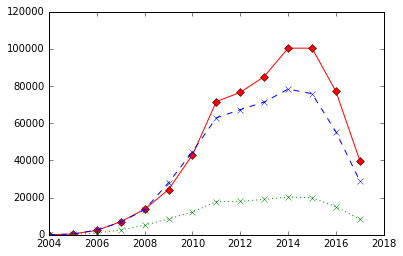

In [39]:
#Plot the graph distinguishing different colors for male, females, and unknown
plt.plot(year_list, female_list, color = 'red', marker ='D', linestyle = 'solid')
plt.plot(year_list, male_list, color = 'blue', marker = 'x', linestyle = 'dashed')
plt.plot(year_list, unknown_list, color ='green', marker = 'x', linestyle = 'dotted')
plt.show()


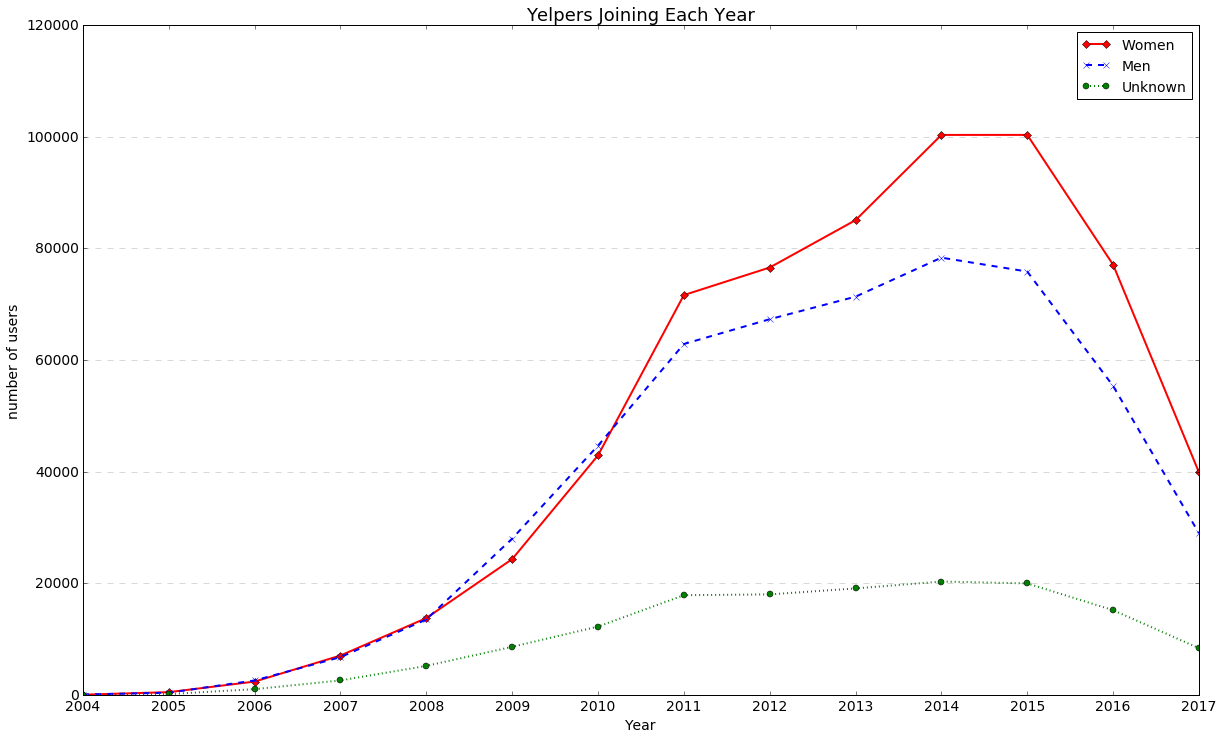

In [38]:
#In depth graph which shows the title, legend, and distuinguishes the color between male, female, and unknown

plt.figure (figsize = (20,12))
plt.title ("Yelpers Joining Each Year", fontsize = 18)
plt.ylabel ("number of users", fontsize=14)
plt.xlabel ("Year", fontsize=14)
plt.xticks (range(2004, 2018,1), fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)

women, = plt.plot(year_list, female_list, label = 'Women', color ='red', marker = 'D', linestyle = 'solid', linewidth = 2)
men, = plt.plot(year_list, male_list, label = 'Men', color = 'blue', marker = 'x', linestyle ='dashed', linewidth = 2)
unknown, = plt.plot(year_list, unknown_list, label = 'Unknown', color = 'green', marker = 'o', linestyle = 'dotted', linewidth = 2)
plt.legend([women,men,unknown], ["Women", "Men", "Unknown"], fontsize = 14)
plt.show()